<h2> Activit&eacute; 2 - Vérification de la 2ème loi de Kepler 
</h2>

In [69]:
#Import des bibliothèques nécessaires au fonctionnement du programme
import matplotlib.pyplot as plt
import math as m
import scipy.optimize as op 
#déclaration des listes 
t,M,u,theta,R,X,Y = [],[],[],[],[],[],[]

In [70]:
# Données d’astronomie de la comète de Halley
T_rev = 76.09 #période de révolution (an) 
a = 17.83     # demi grand axe en (UA)
e = 0.967     # excentricité
N = 40       # nombre de positions

In [71]:
# Résolution des équations de Kepler 
# détermination de la position de l'astre autour de son orbite
for i in range(N):
	t.append(i*T_rev /N)
	M.append(2*m.pi/T_rev *t[i]) 
	u.append(float(op.fsolve (lambda x:x-e*m.sin(x)-M[i],0) ))
# Calcul des coordonnées polaires
	theta.append(2*m.atan((m.sqrt((1+e)/ (1-e))*m.tan(u[i]/2))))
	R.append(a*(1-e**2)/(1+e*m.cos(theta[i]))) 
# calcul des corrdonnées cartésiennes
	X.append(R[i]*m.cos(theta[i])) 
	Y.append(R[i]*m.sin(theta[i]))

In [72]:
# Aires des triangles
# B,C points utilisés pour repérer la 1ere aire, D et E points pour repérer la seconde aire
# le chiffre 0 correspond au point le plus à droite de la trajectoire, 
# les points sont ensuite numérotés de 0 à N selon le sens trigonomètrique
B,C = 4,6 
D = 20      
E = D + (C-B) # valeur de E tel que l'intervalle entre B et C soit ......... à l'intervalle entre D et E
# ATTENTION: les valeurs des points sont forcément inférieurs au nombre total de points N + la valeur de l'intervalle

In [73]:
# Initialisation des variables 
AIRE1,AIRE2 = 0,0 
i1,i2 = 0,0 

In [74]:
#Calcul de l’aire balayée entre les points B et C
Delta_1 =C-B # calcul de l'intervalle entre les points
for i1 in range(Delta_1):
# Calcul des longueur des cotés des triangles
   long11 = m.sqrt((X[B+i1])**2+(Y[B+i1])**2)
   long12 = m.sqrt((X[C+i1])**2+(Y[C+i1])**2)
   long13 = m.sqrt((X[C+i1]-X[B+i1])**2+(Y[C+i1]-Y[B+i1])**2) 
# calcul du demi périmètre
   demi_perim_1 = 1/2*(long11+long12+long13)
# Calcul de l'aire par la formule de Héron
   AIRE1 = m.sqrt(demi_perim_1*(demi_perim_1-long11)*(demi_perim_1-long12)*(demi_perim_1-long13))+AIRE1

In [75]:
#Calcul de l’aire balayée entre les points D et E 
Delta_2 =E-D # calcul de l'intevalle entre les points
for i2 in range(Delta_2):
# Calcul des longueur des cotés des triangles
    long21 = m.sqrt((X[D+i2])**2+(Y[D+i2])**2)
    long22 = m.sqrt((X[E+i2])**2+(Y[E+i2])**2)
    long23 = m.sqrt((X[E+i2]-X[D+i2])**2+(Y[E+i2]-Y[D+i2])**2)
# calcul du demi périmètre
    demi_perim_2 = 1/2*(long21+long22+long23)
# Calcul de l'aire par la formule de Héron
    AIRE2 = m.sqrt(demi_perim_2*(demi_perim_2-long21)*(demi_perim_2-long22)*(demi_perim_2-long23)) +AIRE2

In [76]:
#Affichage de l'aire calculée (unité : UA au carré)
print('aire A1 balayée entre les points B et C --> ' + str(AIRE1)) 
print('aire A2 balayée entre les points D et E --> ' + str(AIRE2))

aire A1 balayée entre les points B et C --> 0.24521153296473489
aire A2 balayée entre les points D et E --> 0.2543125748947479


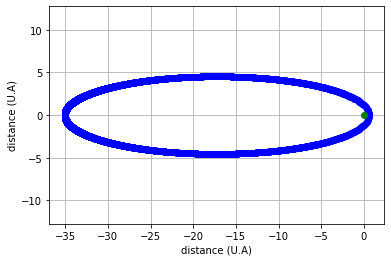

In [77]:
#Affichage de l’orbite 
plt.grid(True) 
plt.xlabel("distance (U.A)") 
plt.ylabel("distance (U.A)") 
plt.axis('equal')
plt.plot(X,Y,"bo") 
plt.plot(0,0,"go")
plt.show()